NAME : HARSH SAOJI

ROLL NO. 38

SUBJECT : DEEP LEARNING

In [1]:
!pip install yfinance


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step

📊 LSTM Results:
RMSE: 8.4697
MAE : 7.1140
R²  : 0.5406


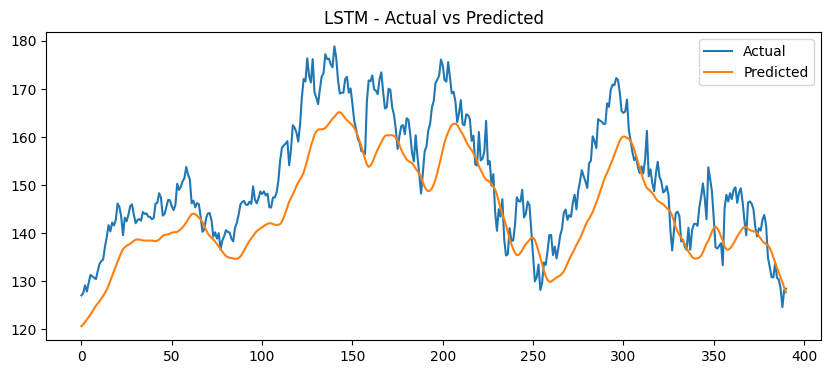

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step

📊 GRU Results:
RMSE: 4.7740
MAE : 3.8853
R²  : 0.8540


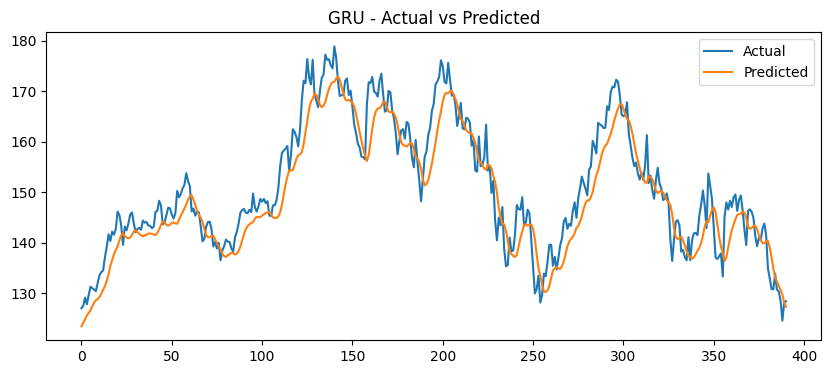

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

📊 1D CNN Results:
RMSE: 6.8366
MAE : 5.6529
R²  : 0.7006


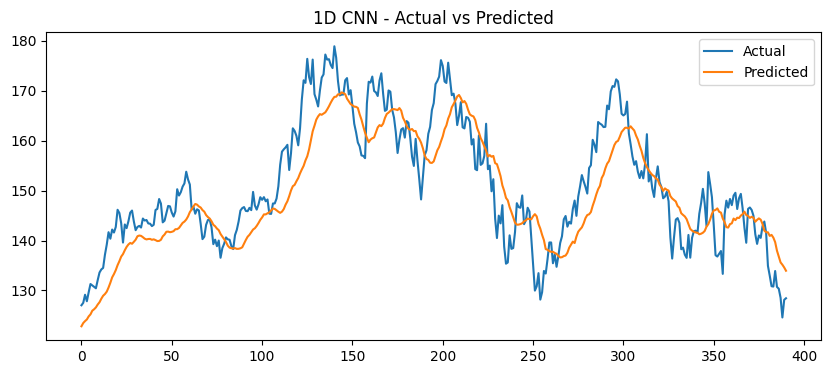

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Conv1D, MaxPooling1D, Flatten

# Step 1: Load Data
df = yf.download('AAPL', start='2015-01-01', end='2023-01-01')
df = df[['Close']]

# Step 2: Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Step 3: Create Sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_len = 60
X, y = create_sequences(scaled_data, seq_len)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Step 4: Train-Test Split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Step 5: Define Models

# Model 1: LSTM
def build_lstm():
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Model 2: GRU
def build_gru():
    model = Sequential([
        GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        Dropout(0.2),
        GRU(50),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Model 3: 1D CNN
def build_cnn():
    model = Sequential([
        Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(50, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Step 6: Train & Evaluate
def train_and_evaluate(model, name):
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    pred = model.predict(X_test)
    pred = scaler.inverse_transform(pred)
    y_real = scaler.inverse_transform(y_test.reshape(-1, 1))

    rmse = np.sqrt(mean_squared_error(y_real, pred))
    mae = mean_absolute_error(y_real, pred)
    r2 = r2_score(y_real, pred)

    print(f"\n📊 {name} Results:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE : {mae:.4f}")
    print(f"R²  : {r2:.4f}")

    plt.figure(figsize=(10,4))
    plt.plot(y_real, label='Actual')
    plt.plot(pred, label='Predicted')
    plt.title(f'{name} - Actual vs Predicted')
    plt.legend()
    plt.show()

# Train all models
train_and_evaluate(build_lstm(), "LSTM")
train_and_evaluate(build_gru(), "GRU")
train_and_evaluate(build_cnn(), "1D CNN")
